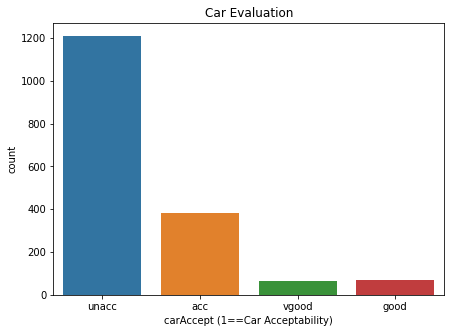

In [1]:
import pandas as pd
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
import sklearn.tree as tree

df = pd.read_csv('car_evaluation.csv', header =None)
df.shape
df.head()
cols = ['BuyPrice', 'Maintenance', 'NumDoors', 'NumPersons', 'LuggageBoot', 'Safety', 'carAccept']
df.columns = cols
df.head()

#Data Visualisation
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='carAccept', data=df)
_ = plt.title('Car Evaluation')
_ = plt.xlabel('carAccept (1==Car Acceptability)')

#preprocessing data 

df.isnull().any()
df = df.fillna(method='ffill')
x = df.drop('carAccept', axis=1)
y = df['carAccept']


[Text(0.75, 0.9, 'X[19] <= 0.5\ngini = 0.452\nsamples = 1209\nvalue = [266, 50, 852, 41]'),
 Text(0.625, 0.7, 'X[12] <= 0.5\ngini = 0.576\nsamples = 802\nvalue = [266, 50, 445, 41]'),
 Text(0.5, 0.5, 'X[7] <= 0.5\ngini = 0.628\nsamples = 542\nvalue = [266, 50, 185, 41]'),
 Text(0.25, 0.3, 'X[1] <= 0.5\ngini = 0.63\nsamples = 407\nvalue = [218, 50, 98, 41]'),
 Text(0.125, 0.1, 'gini = 0.56\nsamples = 311\nvalue = [182, 18, 94, 17]'),
 Text(0.375, 0.1, 'gini = 0.684\nsamples = 96\nvalue = [36, 32, 4, 24]'),
 Text(0.75, 0.3, 'X[1] <= 0.5\ngini = 0.458\nsamples = 135\nvalue = [48, 0, 87, 0]'),
 Text(0.625, 0.1, 'gini = 0.343\nsamples = 100\nvalue = [22, 0, 78, 0]'),
 Text(0.875, 0.1, 'gini = 0.382\nsamples = 35\nvalue = [26, 0, 9, 0]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 260\nvalue = [0, 0, 260, 0]'),
 Text(0.875, 0.7, 'gini = 0.0\nsamples = 407\nvalue = [0, 0, 407, 0]')]

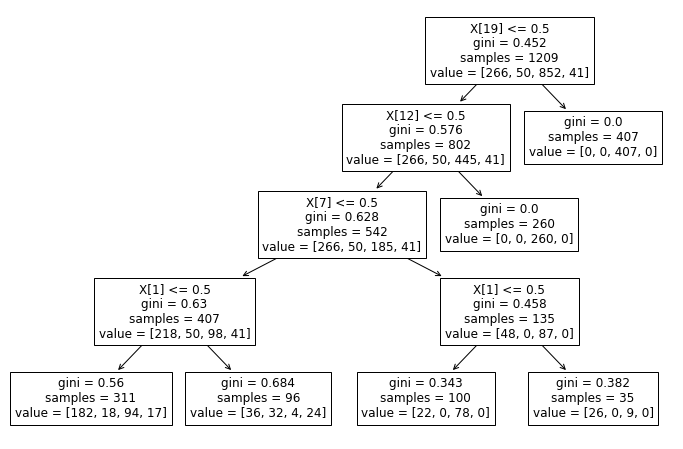

In [4]:
#split the data into training and testing datasets
# this is the last time we remind you that random_state parameter allows you to obtain the same results every time your run the train_test_split statement
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# Scaling Data and String Conversion to Numeric
num_cols = x_train.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = x_train.select_dtypes(include=['object']).columns.tolist()

#impute and standardize numeric data - Pipeline
num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

#impute and convert to numeric the categorical data - Pipeline
cat_pipe = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='N/A'),
    OneHotEncoder(handle_unknown='ignore', sparse=False)
)

#complete pipeline for both data types
full_pipe = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

# Prepare the model: pre-processing + decision tree algorithm
Treemodel = Pipeline(steps=[
    ('dt_preprocessor', full_pipe),
    ('dt_classifier', DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0))])

#Train the DT algorithm i.e., create decision tree model
Treemodel.fit(x_train, y_train)

#Plot Decision Tree
plt.figure(figsize=(12,8))
plot_tree(Treemodel['dt_classifier'])


In [3]:
# Make predictions on the test set
y_train_pred = Treemodel.predict(x_train)

# Measure Model's performance on the training Dataset
trnscore = accuracy_score(y_train, y_train_pred)*100
print("Training Accuracy Score: {:.2f} %".format( trnscore ))
print("Training Classification report - \n", classification_report(y_train,y_train_pred))

# Make predictions on the testing dataset
y_test_pred = Treemodel.predict(x_test)

#Measure Model's performance on the Testing Dataset
testscore = accuracy_score(y_test, y_test_pred) *100

print("Test Accuracy Score: {:.2f} %".format( testscore ))
print("Test Classification report - \n", classification_report(y_test,y_test_pred))

Training Accuracy Score: 81.80 %
Training Classification report - 
               precision    recall  f1-score   support

         acc       0.55      0.92      0.69       266
        good       0.00      0.00      0.00        50
       unacc       0.97      0.87      0.92       852
       vgood       0.00      0.00      0.00        41

    accuracy                           0.82      1209
   macro avg       0.38      0.45      0.40      1209
weighted avg       0.81      0.82      0.80      1209

Test Accuracy Score: 82.27 %
Test Classification report - 
               precision    recall  f1-score   support

         acc       0.57      0.88      0.69       118
        good       0.00      0.00      0.00        19
       unacc       0.96      0.90      0.93       358
       vgood       0.00      0.00      0.00        24

    accuracy                           0.82       519
   macro avg       0.38      0.45      0.41       519
weighted avg       0.79      0.82      0.80       519



Confusion Matrix For Decision Tree Model Using Training Dataset:
 [[244   0  22   0]
 [ 50   0   0   0]
 [107   0 745   0]
 [ 41   0   0   0]]


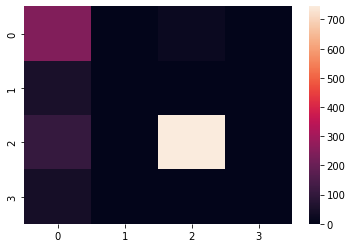

Confusion matrix For Decision Tree Model Using Testing Dataset :
 [[104   0  14   0]
 [ 19   0   0   0]
 [ 35   0 323   0]
 [ 24   0   0   0]]


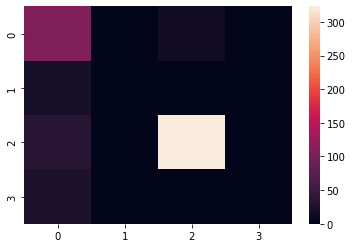

In [ ]:
# Compute and display confusion matrix on the training dataset 
print('Confusion Matrix For Decision Tree Model Using Training Dataset:\n', confusion_matrix(y_train, y_train_pred))
sns.heatmap(pd.DataFrame(confusion_matrix(y_train,y_train_pred)))
plt.show()

# Compute and display confusion matrix on the testing dataset 
print('Confusion matrix For Decision Tree Model Using Testing Dataset :\n', confusion_matrix(y_test, y_test_pred))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_pred)))
plt.show()


Test Accuracy Score After Optimisation: 94.99 %


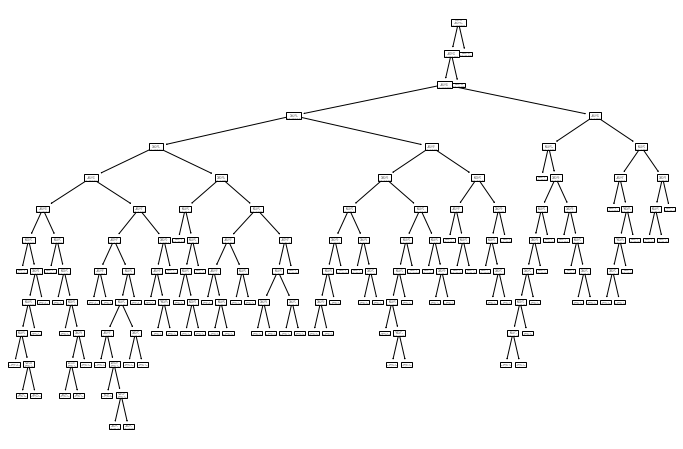

In [23]:
#Optimise the Model using GridSearch
parameters = {'dt_classifier__criterion':['gini','entropy'],
              'dt_classifier__max_depth':[2,3,4,5,6,7,20,30,40,50,60,70,100,130,140,150]
             }

clf = GridSearchCV(estimator=Treemodel, param_grid=parameters, cv=10)
optimalmodel = clf.fit(x_train, y_train)

#Plot Decision Tree 
plt.figure(figsize=(12,8))
#plot_tree(Treemodel['dt_classifier']) # that ws only a re-plot of the first treeModel before gridsearch
plot_tree(optimalmodel.best_estimator_['dt_classifier'])

#Make predictions with the optimized model
bestfit_pred = optimalmodel.predict(x_test)

#Compute the optimized Model's accuracy
optscore = accuracy_score(y_test, bestfit_pred)*100
print("Test Accuracy Score After Optimisation: {:.2f} %".format( optscore ))